In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [2]:
 !apt-get install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 129 kB of archives.
After this operation, 322 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 unrar amd64 1:5.5.8-1 [129 kB]
Fetched 129 kB in 0s (170 kB/s)
Selecting previously unselected package unrar.
(Reading database ... 19833 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a5.5.8-1_amd64.deb ...
Unpacking unrar (1:5.5.8-1) ...
Setting up unrar (1:5.5.8-1) ...
update-alternatives: using /usr/bin/unrar-nonfree to provide /usr/bin/unrar (unrar) in auto mode


In [3]:
!ls

datalab


In [4]:
!mkdir -p drive
!google-drive-ocamlfuse drive 

In [5]:
!ls

datalab  drive


In [0]:
!unrar x "drive/ML/data2.rar"

In [7]:
import pandas as pd
import numpy as np
import csv
from PIL import Image
%matplotlib inline
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
train.head()

,name,age
0,ML000001.jpg,0
1,ML000002.jpg,0
2,ML000003.jpg,0
3,ML000004.jpg,0
4,ML000005.jpg,0


## 以下是train_data的生成 ##

In [0]:
import csv
import pandas as pd
from PIL import Image
import random
train = pd.read_csv("train.csv")
# 開啟輸出的 CSV 檔案
with open('drive/ML/output_train.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile, delimiter=',')
  # 寫入一列資料
  writer.writerow(['age', 'feature'])
  #------------
  train_age = train["age"]
  train_name = train["name"]

  data=""
  i=random.sample(range(1,152551),50000)
  q=0
  for age in train_age:
    
      
      filename="ML"+"%06d" % i[q]+".jpg"
      image = Image.open("train/"+filename)
      image = image.convert('L')
      width = image.size[0]
      height = image.size[1]
      image=image.resize((100,100),Image.ANTIALIAS) 
      width = image.size[0]
      height = image.size[1]
      print()
      for x in range(width):
          for y in range(height):
              g= image.getpixel((x,y))
              if (x == width-1)&(y == height-1):
                  data+=str(g)                    
              else:
                  data+=str(g)+" "
      writer.writerow([train_age[i[q]], data])
      data=""
      print(q,i[q])
      image.close()
      q+=1
      if(q==5000):
          break
csvfile.close()



In [0]:

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

x = pd.read_csv("drive/ML/output_train.csv")
print(x.values.shape)
print(x.head())

data = x.values
print(data.shape)
print(data[0, 0])

y = data[:, 0]
pixels = data[:, 1]
print(type(pixels))
print(len(pixels[0]))
print(pixels[10][10])

X = np.zeros((pixels.shape[0], 100*100))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])
        

np.save('facial_data_X', X)
np.save('facial_labels', y)
x = np.load('./facial_data_X.npy')
y = np.load('./facial_labels.npy')
for ix in range(2):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((100, 100)), interpolation='none', cmap='gray')
plt.show()

In [0]:
from keras.utils import np_utils
train =pd.read_csv("drive/ML/output_train.csv")
train_label = train['age']
train_feature = train['feature']


#for tf in train_feature:
#  aa=tf.split(' ')
#  aa.pop()
  #np.reshape(aa,(50,50))
#  train_data = np.array([np.reshape(aa,(50,50))])
#  print(train_data)

  #train_data = np.array([np.reshape(tf.split(' '),(100,100))for tf in train_feature])

train_data = np.array([np.reshape(tf.split(' '),(100,100))for tf in train_feature])
print(np.shape(train_data))
#print(train_data.shape[0])

train4d = train_data.reshape(train_data.shape[0], 100, 100, 1).astype('float32')
train4d_norm = train4d/255.0
train_oneHot = np_utils.to_categorical(train_label)
print(train_oneHot[:1])

In [0]:
print("\t[Info] Shape of train data=%s" % (str(train4d.shape)))

## 以下是test_data的生成 ##

In [0]:
import csv
import pandas as pd
from PIL import Image
import random
test = pd.read_csv("test.csv")

# 開啟輸出的 CSV 檔案
with open('drive/ML/output_test.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile, delimiter=',')
  # 寫入一列資料
  writer.writerow(['id', 'feature'])
  #------------
  #train_age = train["age"]
  #train_name = train["name"]

  data=""
  #i=random.sample(range(1,152551),50000)
  q=1
  for i in range(152551,163447):
    
      
      filename="ML"+"%06d" % i+".jpg"
      image = Image.open("test/"+filename)
      image = image.convert('L')
      width = image.size[0]
      height = image.size[1]
      image=image.resize((100,100),Image.ANTIALIAS) 
      width = image.size[0]
      height = image.size[1]
      print()
      for x in range(width):
          for y in range(height):
              g= image.getpixel((x,y))
              if (x == width-1)&(y == height-1):
                  data+=str(g)                    
              else:
                  data+=str(g)+" "
      writer.writerow([q, data])
      data=""
      print(q,i)
      image.close()
      q+=1
      if(i==163446):
          break
csvfile.close()



In [0]:
x = pd.read_csv("drive/ML/output_test.csv")
print(x.head())

In [14]:
from keras.utils import np_utils
test = pd.read_csv("drive/ML/output_test.csv")
test_feature = test['feature']
test_data = np.array([np.reshape(tf.split(' '), (100, 100)) for tf in test_feature])
test4d = test_data.reshape(test_data.shape[0], 100, 100, 1).astype('float32')
print("\t[Info] Shape of test data=%s" % (str(test4d.shape)))
test4d_norm = test4d/255.0

	[Info] Shape of test data=(10896, 100, 100, 1)


## 以下是訓練過程 ##

### 普通CNN ###

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.layers import Activation
from keras import optimizers

model = Sequential()
model.add(Conv2D(filters = 144,kernel_size = (5,5),padding = 'same',input_shape = (100,100,1),activation = 'relu'))
model.add(Conv2D(filters = 144,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(filters = 144,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 144,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.35))

model.add(Conv2D(filters = 144,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 144,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.35))

model.add(Conv2D(filters = 144,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 144,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.3)) 
model.add(Dense(6, activation='softmax'))  
model.summary()  
print("")

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
train_history = model.fit(x=train4d_norm,y=train_oneHot,validation_split=0.2,epochs=15,batch_size=300,verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 100, 100, 144)     3744      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 100, 100, 144)     518544    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 144)       0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 50, 50, 144)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 144)       518544    
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 144)       518544    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 144)       0         
__________

Epoch 14/15
 - 106s - loss: 1.5683 - acc: 0.2607 - val_loss: 1.5655 - val_acc: 0.2700
Epoch 15/15
 - 106s - loss: 1.5636 - acc: 0.2522 - val_loss: 1.5652 - val_acc: 0.2700


### VGG19 ###

In [0]:
keras.applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

## 训练结果及验证 ##

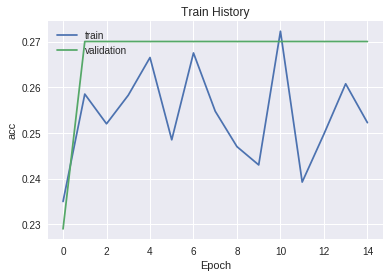

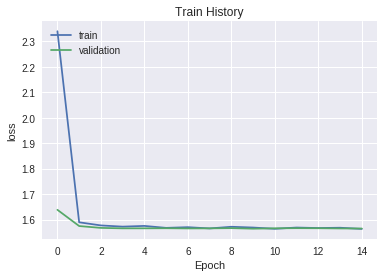

5000/5000 [==============================] - 19s 4ms/step

	[Info] Accuracy of testing data = 27.0%


In [26]:
def show_trainHistory(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    plt.show()

def plot_imageLablePredict(images,labels,prediction,idx,num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0,num):
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()

show_trainHistory(train_history, 'acc', 'val_acc')
show_trainHistory(train_history, 'loss', 'val_loss')

scores = model.evaluate(train4d_norm, train_oneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

In [20]:
print(test4d_norm.shape)
print("\t[Info] Making prediction of test4d_norm")  
prediction = model.predict_classes(test4d_norm)  # Making prediction and save result to prediction  
print()  
print(prediction.shape)
with open('drive/ML/output.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile,delimiter = ',')
    writer.writerow(['id','age'])
    count = 1
    for i in prediction:
        writer.writerow([count,i])
        count += 1
    print("output.csv_Done")

(10896, 100, 100, 1)
	[Info] Making prediction of test4d_norm

(10896,)
output.csv_Done
